# Number Classification 

## Importing Libraries

In [8]:
import numpy as np
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

## Loading Image Data
TODO: 
- Load the image data
- Reshape the matrices
- Turn the y data into class categories

In [9]:
def load_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  print(f'Using {x_train.shape[0]} training data.')
  print(f'Using {x_test.shape[0]} testing data.')
  
  # Reshape the images
  x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
  x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

  # Turn the y lists into class categories
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return x_train, y_train, x_test, y_test

## Prepare the images
Turn the images into floating point numbers (decimals) and "normalize" them

In [10]:
def prep_images(train, test):
  # Convert the integers to decimals
  train_norm = train.astype('float32')
  test_norm = train.astype('float32')

  # Make the numbers go between 0-1
  train_norm /= 255.0
  test_norm  /= 255.0

  return train_norm, test_norm

## Create our model
We create our model layer by layer. Our network structure is as follows:
1. **Convolutional Layer**: This will take a region of our image and "simplify it", decreasing the amount of data but still keeping important features.
2. **Max-Pooling layer** These layers will help us simplify our feature maps even more.
3. **Dense Layer**: Like in traditional neural networks, these layers connect to all the neurons in the next layer.

In [11]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))

  # compile our model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

## Evaluate the model
To see how our model is performing, we use a small part of our training set as a small "test set".

In [12]:

def evaluate_model(x_data, y_data, n_folds=5):
  scores, histories = [], []
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(x_data):
    model = create_model()
    model.summary()
    # Get our training dataset
    x_train, y_train  = x_data[train_ix], y_data[train_ix]

    # Get our testing data set
    x_test, y_test = x_data[test_ix], y_data[test_ix] 
    print(f'Shapes: {x_train.shape}\t{x_test.shape}')
    # Pass our data along our model
    history = model.fit(x_train, 
                        y_train, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(x_test, y_test))

    # evaluate our model
    _, acc = model.evaluate(x_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
    return scores, histories


## Summarize model's preformance
Here we make a graph with the accuracies of our model.

In [13]:
def plot_model_performance(histories):
  for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Error')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot the accuracy
    plt.subplot(2, 1, 2)
    plt.title('Model Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

## Main function
Here is where our program starts executing.

Using 60000 training data.
Using 10000 testing data.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
d

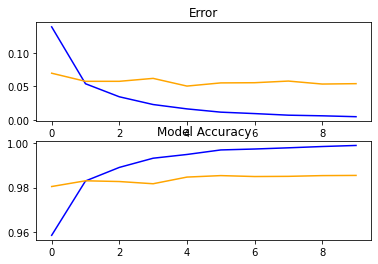

Accuracy: mea = 98.550, images = 1.000


In [14]:
def main():
  # Load the dataset
  x_train, y_train, x_test, y_test = load_dataset()
  x_train, x_test = prep_images(x_train, x_test)
  # Evaluate our model
  scores, histories = evaluate_model(x_train, y_train)
  # Make a graph with our model's performance
  plot_model_performance(histories)

  # Print our model's performance
  print('Accuracy: mea = %.3f, images = %.3f' % (np.mean(scores)*100, len(scores)))
  
if __name__=='__main__':
  main()